In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
coad_data = pd.read_csv('/mnt/c/Users/donna/Downloads/Thesis/brca_correlaties/TCGA_data/coad_atac_data.csv', header=None)
peak_names = pd.read_csv('/mnt/c/Users/donna/Downloads/Thesis/brca_correlaties/TCGA_data/filtered_peak_names.csv', header=None).values
brca_data = pd.read_csv('/mnt/c/Users/donna/Downloads/Thesis/brca_correlaties/TCGA_data/brca_atac_data.csv', header=None)

In [3]:
combined = pd.concat([coad_data, brca_data], axis=1).values

In [4]:
peak_var = np.empty((len(peak_names), 2), dtype=object)

peak_var[:, 0] = peak_names.flatten()

In [5]:
for i in range(len(peak_var)):
    peak_var[i, 1] = np.var(combined[i, :])

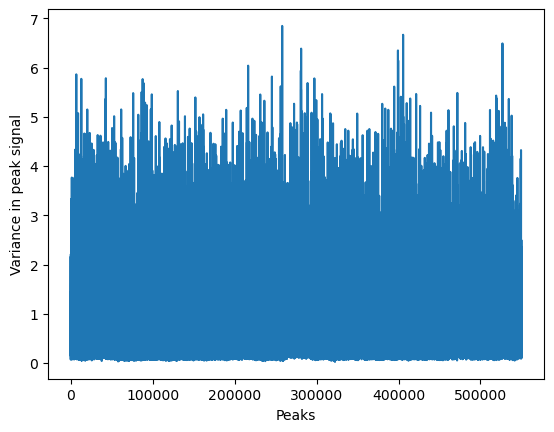

In [6]:
plt.plot(peak_var[:, 1])
plt.xlabel("Peaks")
plt.ylabel("Variance in peak signal")
plt.show()

In [9]:
peak_var_df = pd.DataFrame(peak_var)
top_peaks = peak_var_df.sort_values(by=peak_var_df.columns[1], ascending=False).head(10000)
high_var_peaks = top_peaks.values[:,0]

In [10]:
print(high_var_peaks)
print(len(high_var_peaks))

['SKCM_48006' 'COAD_85685' 'COAD_114145' ... 'UCEC_28810' 'UCEC_66072'
 'BLCA_24948']
10000


In [11]:
np.savetxt('/mnt/c/Users/donna/Downloads/Thesis/brca_correlaties/high_var_peaks.csv', high_var_peaks, delimiter=",", fmt="%s")